# TP3 - Linear Regression

Hello ! Bienvenu dans mon TP ! Je te souhaite bon courage :) 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression as lr
import warnings

In [2]:
warnings.filterwarnings('ignore')

***
## Q-1
**Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/
portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.**

In [3]:
url = "https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv" 

In [4]:
df = pd.read_csv(url, sep=",", header=None)

X = df.iloc[0:,0:-1]
Y = df.iloc[0:,-1:]

In [5]:
print ('Il y a {} variables observations et {} variables explicatives'.format(X.shape[0],X.shape[1]))
df.head(10)

Il y a 442 variables observations et 210 variables explicatives


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
5,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0
6,-0.501760,0.191544,-0.225878,-0.240506,1.350852,-1.253936,1.319458,2.007870,0.423578,0.417597,...,0.382681,-0.146417,-0.529950,-0.568923,0.340738,-1.312723,-0.366522,-0.347242,1.055200,138.0
7,-1.012528,-1.383290,0.686803,2.146420,1.255864,0.806962,0.137307,0.699977,-1.311624,-0.999770,...,-0.444868,-1.175901,0.481975,-0.329621,-1.712838,-0.047186,0.039768,-0.403074,0.249330,63.0
8,0.532639,1.691226,-0.008375,-1.478906,1.278352,-0.176214,-0.806066,0.515730,0.786887,-0.984347,...,0.183080,-0.194879,0.669917,-1.899072,0.122637,0.959231,-0.078359,-0.117192,1.664998,110.0
9,-0.537216,-0.128677,-0.815059,-1.273897,-0.985841,1.021629,-0.956690,1.009193,-0.030585,1.137275,...,-0.559667,-0.178620,1.130455,-1.158422,-0.376790,0.512715,-0.618469,1.463988,1.519603,310.0


***
## Q-2
**Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.**

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,...,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,2.009453e-17,4.018907e-18,0.000000,-2.009453e-18,-2.009453e-18,-4.018907e-18,1.105199e-17,0.000000,-8.037814e-18,-1.607563e-17,...,-4.018907e-18,0.000000,4.018907e-18,-2.009453e-18,1.205672e-17,2.587171e-17,4.018907e-18,4.018907e-18,1.306145e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-0.716098,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-0.638769,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-0.579332,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,0.047394,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,0.040166,6.047571e-04,3.602406e-02,...,-2.994795e-02,0.025405,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,0.697512,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,0.578844,6.298078e-01,6.629150e-01,...,6.672697e-01,0.667664,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [7]:
# On Vérifie si X est centrée :
a = X.mean().abs().max()
print("On constate que la moyenne max des X vaut %.6f, cela montre les variables explicatives sont centrés." %a)

# On vérifie si X est réduite :
b = X.var(axis=0, ddof=1).max()
print("On constate que la variance max des X vaut {0:.6f}, On peut considérer que les variables sont réduites.".format(b))

On constate que la moyenne max des X vaut 0.000000, cela montre les variables explicatives sont centrés.
On constate que la variance max des X vaut 1.002268, On peut considérer que les variables sont réduites.


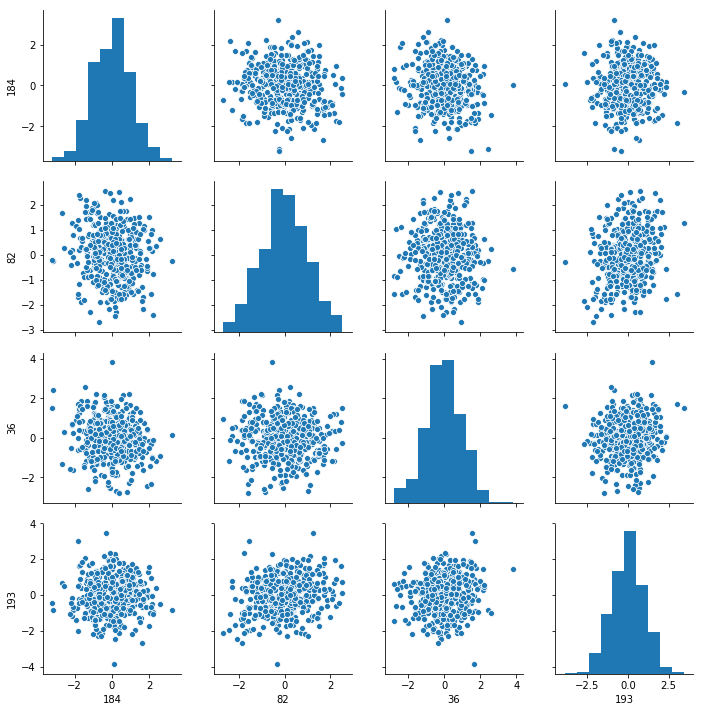

In [8]:
# Scatter plot
import seaborn as sns
sns.pairplot(X.loc[:,np.random.randint(0,210,4)])

**On constate qu'il est difficile de trouver une correlation directe entre Y et la plupart des variables explicatives**

***
## Q-3
**Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain,
un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas
normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.**

In [9]:
# Split du Data_set en Train_set et Test_set :
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

print ("X_train est de la forme {} ligne et {} colonnes \nY_train est de la forme {} lignes et {} colonnes".format(X_train.shape[0], X_train.shape[1],Y_train.shape[0],Y_train.shape[1]))
print ("\nX_test est de la forme {} ligne et {} colonnes \nY_test est de la forme {} lignes et {} colonnes".format(X_test.shape[0], X_test.shape[1],Y_test.shape[0],Y_test.shape[1]))


X_train est de la forme 353 ligne et 210 colonnes 
Y_train est de la forme 353 lignes et 1 colonnes

X_test est de la forme 89 ligne et 210 colonnes 
Y_test est de la forme 89 lignes et 1 colonnes


***
## Q-4
**Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs
propres de la matrice de covariance. Expliquer pourquoi il est légitime de ne garder que les premières
variables de l’ACP. On gardera 60 variables dans la suite.**

>$Cov(X) = E[(X-E(X)).(X-E(X))^T] = (X_c^T X_c).(n-1)^{-1}$ où  $X_c$ est la matrice de X centrée <br>
>**Rappel :**

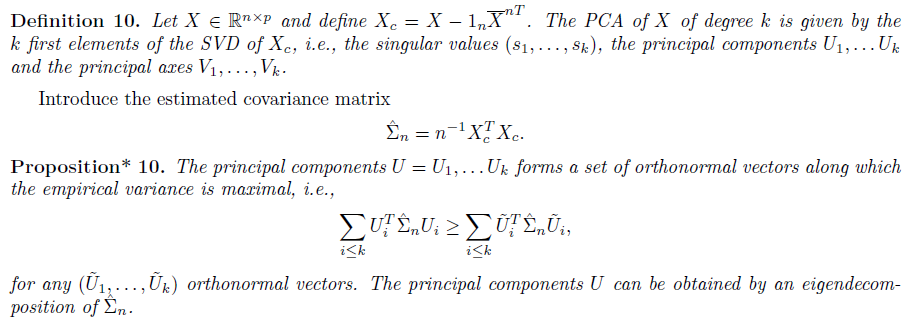

**Ici nous explorerons la fonction PCA de sklearn qui applique les méthodes suivantes :**
- Calcul la SVD de $Cov(X_c)$ et classe les vecteurs U,S,V selon l'ordre décroissant des termes de la matrice diagonale S
- Projection de $X_c$ sur la nouvelle base formée des k composantes princiapales de la matrice $V^T$, (ici k=60)

 **Il est important de remarquer qu'il faut centrer les X pour faire la PCA**
> La relation entre SVD, Cov(X) et PCA est bien synthétisée ici je trouve :<br>
https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

In [10]:
# Matrice de covariance :
X_train.cov()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.951659,-0.114670,-0.036096,-0.307562,0.099498,0.142429,-0.090804,-0.204666,-0.031450,-0.042105,...,-0.110136,-0.025597,0.027049,0.035418,-0.067395,0.026417,-0.105302,0.032544,0.150840,0.016502
1,-0.114670,1.037060,0.096461,-0.193934,-0.101510,-0.124568,0.167980,-0.143550,0.072721,-0.100676,...,-0.110911,-0.042546,-0.065283,-0.220525,-0.020806,0.055082,0.027408,-0.125865,-0.063878,0.010379
2,-0.036096,0.096461,1.043458,-0.209761,0.127342,-0.089800,-0.090315,0.023447,-0.036294,-0.169766,...,0.171892,0.016333,0.140376,0.051888,0.030185,0.084359,-0.067451,-0.350041,0.009491,-0.143508
3,-0.307562,-0.193934,-0.209761,0.927242,-0.031828,-0.069256,0.185798,-0.038682,0.078158,0.025912,...,0.042600,-0.000060,-0.140617,0.131595,-0.027798,-0.205265,0.040143,-0.049746,-0.163300,-0.364187
4,0.099498,-0.101510,0.127342,-0.031828,0.939403,-0.035698,0.019815,0.215876,0.002817,0.090524,...,0.134749,0.012422,0.118374,-0.000736,-0.105617,-0.144025,0.007759,-0.028114,0.007494,-0.018686
5,0.142429,-0.124568,-0.089800,-0.069256,-0.035698,1.070670,0.159976,-0.062758,-0.119800,0.003832,...,-0.008665,-0.144131,0.036428,0.262309,-0.003056,-0.006773,0.057257,0.309613,0.043698,0.177658
6,-0.090804,0.167980,-0.090315,0.185798,0.019815,0.159976,1.053356,0.103138,0.139557,0.155737,...,-0.014737,-0.124944,-0.024052,0.079275,0.075236,-0.034940,0.052147,0.128007,0.047899,-0.014300
7,-0.204666,-0.143550,0.023447,-0.038682,0.215876,-0.062758,0.103138,1.015436,-0.020712,0.061896,...,-0.201965,-0.043041,-0.047826,0.118678,0.089920,0.015961,-0.022799,-0.272673,-0.045384,0.010140
8,-0.031450,0.072721,-0.036294,0.078158,0.002817,-0.119800,0.139557,-0.020712,0.994586,-0.093866,...,0.293790,-0.065406,-0.008339,-0.095170,0.036403,0.078237,-0.126113,-0.200542,0.023367,-0.174169
9,-0.042105,-0.100676,-0.169766,0.025912,0.090524,0.003832,0.155737,0.061896,-0.093866,0.990098,...,0.188103,-0.037760,0.061435,-0.050982,0.159021,0.091085,0.130028,0.103162,0.127460,0.084865


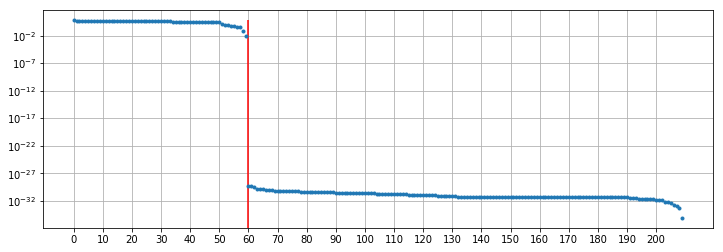

In [15]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='auto')

# Fit le model à la matrice X_train
pca.fit(X_train)

# Valeurs propres de la matrice cov(X_train) triées par ordre décroissant :
v_propres = pca.explained_variance_
"""
Cette fonction revient exactement à calculer les valeurs propres de la matrice de Cov(Xc_train) et les trier par ordre croissant.
On peut le vérifier : 
Xc_train = X_train - X_train.mean()
U,S,V = np.linalg.svd(Xc_train.cov())
print("%.f6" %max(S[:60] - pca.explained_variance_))
"""

figure(figsize=(12,4))
plt.grid()
plt.xticks(np.arange(0, 210, 10))
plt.plot(pd.DataFrame(v_propres),'.')
plt.vlines(x=60, ymin=0, ymax=6, colors='r')
plt.yscale(value="log")


**Sur ce graphe nous pouvons voir que les valeurs propres de la matrice de covariances valent zéro à partir du 60ème vecteur. Ce qui veut dire que les autres vecteurs sont des combinaisons linéaires des 60 premiers et par conséquent n'apportent pas d'information complémentaire au modèle.**

In [12]:
"""Méthode PCA de Sklearn"""
# application du PCA pour réduire la dimension de X_train en projetant dans la base des 60 vecteurs les plus impactants :
pca = PCA(n_components=60,svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
print("La matrice X_train_pca est de la forme %d lignes et %d colonnes et elle est centrée" %(X_train_pca.shape[0],X_train_pca.shape[1]))



La matrice X_train_pca est de la forme 353 lignes et 60 colonnes et elle est centrée


In [13]:
"""Méthode avec la SVD""" # équivalent à Sklearn
# Xc_train = X_train - X_train.mean()
# U,S,V = np.linalg.svd(Xc_train.cov())
# XV = Xc_train@V.T[:,:60] 
# # Cette matrice XV est strictement égale à X_train_pca calculée avec Sklearn
# # On peut le vérifer par ce calcul : 
# # diff_mat = (XV.abs() - pd.DataFrame(X_train_pca).abs().values).mean().max()
# # print(f"Différence entre les deux matrice vaut {diff_mat:.6h}")
# print(f"La matrice projeté dans la nouvelle base avec les k vecteurs selectionnés : {XV}")


'Méthode avec la SVD'

*** 
## Q-5
**Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et XtrainVp1:60q, où Vp1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.**

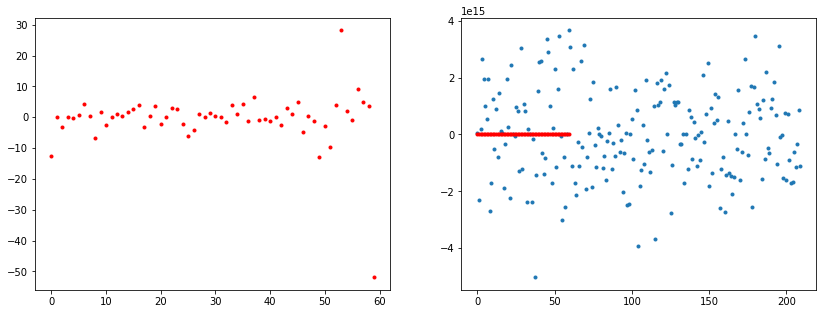

In [14]:
# OLS avec PCA sur le train_set (entrainement du modèle) :
reg_pca = lr(fit_intercept= True).fit(X_train_pca,Y_train) 

# Coefficients de régréssion hors intercept
Bn_train_pca = reg_pca.coef_.T 

# OLS classique sur le train_set (entrainement du modèle) :
reg = lr(fit_intercept= True).fit(X_train,Y_train)

# Coefficients de régréssion hors intercept
Bn_train = reg.coef_.T

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5),sharex=False, sharey=False)
ax[0].plot(pd.DataFrame(Bn_train_pca),'.', color ='r')
ax[1].plot(pd.DataFrame(Bn_train),'.')
plt.plot(pd.DataFrame(Bn_train_pca),'.', color='r')

***
## Q-6
**Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sut le train.**

><p style="color:#FF0000";>Comme évoqué plus tôt, la fonction PCA de Sklearn <b>centre automatiquement</b> les X_train et applique la projection, il n'est donc plus nécessaire de centrer la matrice manuellement comme demandé dans la question. Par conséquent nous obtenons bien l'intercept qui vaut la moyenne des Y. </p>

In [15]:
print("Intercpet avec PCA : %0.6f" %(reg_pca.intercept_[0]))
print("Intercpet avec PCA : %0.6f" %(reg.intercept_[0]))
print("Y_mean : %0.6f" %(Y_train.mean()))

Intercpet avec PCA : 150.458924
Intercpet avec PCA : 149.677674
Y_mean : 150.458924


#### On contate que l'intercept est égal à la moyenne des Y dans le cas de la PCA, ce qui est normal car la matrice des variables est centrée.  

***
## Q-7
**Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.**

In [16]:
X_test.loc[:,:59]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
212,0.038768,0.613660,-0.561864,-1.818375,-0.158363,-0.187899,0.904500,0.285458,0.295602,-0.564901,...,0.239573,0.902038,0.059658,1.452390,0.266359,-1.593023,-0.032498,0.362687,0.073465,-0.315316
422,1.151892,-0.149560,1.247264,-0.405238,-2.060553,-0.113654,-1.080865,-1.612891,-1.133876,-1.165634,...,1.319921,-0.009263,-1.305692,-0.593504,-0.701023,-0.185517,0.226885,-1.217163,1.636984,-0.652130
67,0.879232,0.303370,-0.350772,1.868990,-0.109219,0.122256,-1.068038,-1.411830,0.475593,-1.091948,...,0.212838,0.286093,0.945558,-0.235624,0.912347,0.869288,-1.775061,-0.023548,-0.311750,1.231139
89,1.446273,-1.199164,0.047356,0.918559,1.100869,-1.659051,0.508854,-0.101907,-0.008551,1.310317,...,-0.213200,-0.388780,0.945576,-0.459377,0.119039,-0.789332,-0.560795,0.321892,-1.014201,0.714876
390,1.554237,-0.407270,1.089516,0.794588,2.217944,-0.378682,-0.640015,-2.893172,0.556260,-0.227857,...,0.144790,1.052072,0.753026,0.360381,-0.115077,1.175869,-1.057443,-1.057448,1.455706,1.508161
32,0.416886,-0.374295,-0.479028,0.056933,0.861357,0.229321,-1.348351,-1.419347,0.661927,0.643180,...,-0.522259,0.294661,-0.162737,-0.491118,-0.248959,0.124045,0.211101,-0.530608,2.634011,0.279122
277,0.126567,-1.935864,1.158832,-0.467728,0.706515,-0.954423,-0.520604,0.526812,0.398729,1.185075,...,0.271279,1.029955,-1.481286,-0.592199,0.081035,-1.692466,2.244958,-0.572859,-1.240798,1.873209
20,0.527660,-1.412873,-0.140295,1.226770,0.740941,-1.605684,-0.436351,-0.004316,-1.093433,1.579742,...,-1.275906,0.868743,1.989207,-1.319041,-1.222174,0.602127,-0.389995,-0.348242,-1.195479,0.587577
214,-0.452252,0.174362,-1.572171,1.068676,-1.161381,-1.615040,1.001080,-0.267994,1.311759,-0.262354,...,0.425993,-0.602046,0.024573,0.352898,1.189836,-1.400757,-1.416428,0.132949,-0.696965,0.532877
146,2.043882,1.195194,0.350722,-1.038734,0.293894,2.129479,1.774997,-0.323802,2.034140,-1.819770,...,0.313353,0.414203,0.899183,-0.964988,1.605410,0.972955,-0.108138,0.002266,1.251769,1.832803


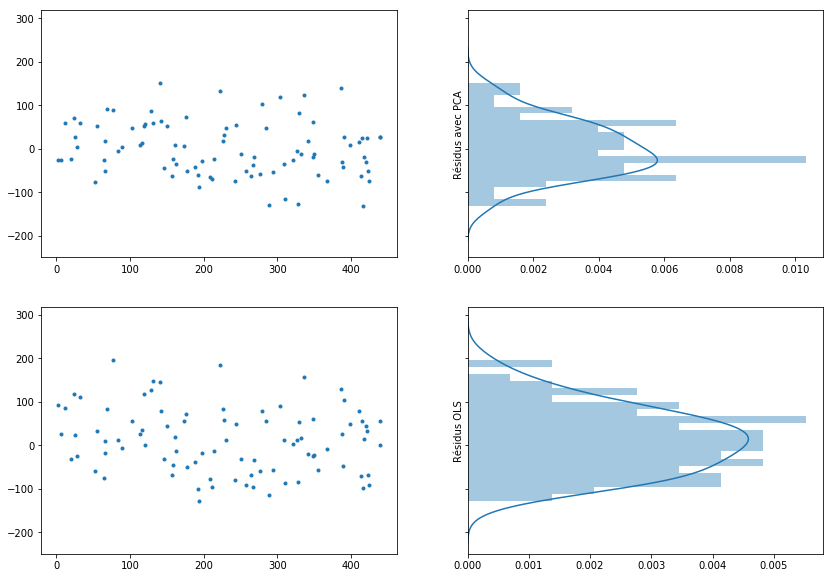

In [17]:
# Application de la réduction de dimension au Test basé sur la même projection que le Train
"""en prenant soin de centrer les valeurs""" 
X_test_pca = pd.DataFrame(pca.transform(X_test)) - X_test.loc[:,:59].mean()

# Résidus OLS sans PCA
Y_pred = reg.predict(X_test)
res_pred = Y_test - Y_pred

# Résidus OLS avec PCA
Y_pred_pca = reg_pca.predict(X_test_pca)
res_pred_pca = Y_test - Y_pred_pca

# plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharey=True)
sns.distplot(res_pred_pca, bins = 20, rug = False, ax=ax[0,1], vertical=True, axlabel='Résidus avec PCA')
ax[0,0].plot(res_pred_pca, '.')
sns.distplot(res_pred, bins = 20, rug = False, ax=ax[1,1], vertical=True, axlabel='Résidus OLS')
ax[1,0].plot(res_pred,'.')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# coef de détermination R²:
cd_ols = reg.score(X_test,Y_test)
cd_pca = reg_pca.score(X_test_pca,Y_test)

# Risque de prédiction : Méthode de calcul avec Sklearn MSE
mse_ols = mean_squared_error(Y_test,Y_pred)
mse_pca = mean_squared_error(Y_test,Y_pred_pca)

# Risque de prédiction : Méthode de calcul comme vue en cours
sigma2_PCA = (Y_test-Y_pred_pca).apply(np.square).sum()/(len(Y_test)- np.linalg.matrix_rank(X_test_pca))
sigma2_OLS = (Y_test-Y_pred).apply(np.square).sum()/(len(Y_test)- np.linalg.matrix_rank(X_test))
r_pred_ols = sigma2_OLS*np.linalg.matrix_rank(X_test)/len(Y_test)
r_pred_pca = sigma2_PCA*np.linalg.matrix_rank(X_test_pca)/len(Y_test)

print ("R_pred OLS sans PCA selon la définition du cours : %0.4f" %r_pred_ols.values[0])
print ("R_pred OLS avec PCA selon la définition du cours : %0.4f" %r_pred_pca.values[0])

print ("\nCoef de détermination OLS sans PCA : %0.4f" %cd_ols)
print ("Coef de détermination OLS avec PCA : %0.4f" %cd_pca)

print ("\nMSE OLS sans PCA : %0.4f" %mse_ols)
print ("MSE OLS avec PCA : %0.4f" %mse_pca)


R_pred OLS sans PCA selon la définition du cours : 11461.1036
R_pred OLS avec PCA selon la définition du cours : 8032.6459

Coef de détermination OLS sans PCA : -0.0026
Coef de détermination OLS avec PCA : 0.2973

MSE OLS sans PCA : 5539.5334
MSE OLS avec PCA : 3882.4455


**On constate que la PCA améliore la prédiction du model OLS**

***
## Q-8
**Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode.
C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables.
Afficher l’ordre de séléction des variables.** 

> **Cette fonction est valable pour la Q-8 et Q-9**

In [59]:
def select_forward(X,y,critere):
    colonne_best = []
    p_val_best = []
    t_stats_best = []
    t_stats_total = []
    colonne_total = []
    pval_best = 1
    j=0
    Xc = X - X.mean()
    list1 = np.arange(Xc.shape[1])

    while j in list1: 
        print("%d" %((j/len(list1))*100), end='\r',)
        t_stats_list = []
        colonne_list = []
        for i in range(Xc.shape[1]):
            regression = sm.OLS(y, Xc.iloc[:,i], hasconst = False).fit()
            pval = regression.pvalues.values[0]
            tstat = np.abs(regression.tvalues.values[0])
            t_stats_list.append(tstat)
            colonne_list.append(Xc.iloc[:,i].name)
            if pval < pval_best:
                pval_best = pval
                tstat_best = tstat
                col_name = Xc.iloc[:,i].name
                X_k_select = Xc[col_name]
        if pval_best > critere:
            list1 = []
        p_val_best.append(pval_best)
        t_stats_best.append(tstat_best)
        t_stats_total.append(t_stats_list)
        colonne_best.append(col_name)
        colonne_total.append(colonne_list)
        y = y - pd.DataFrame(regression.predict(X_k_select)).values
        pval_best = 1
        Xc = Xc.drop(columns=[col_name])
        j+=1

    return colonne_best, p_val_best, t_stats_best, t_stats_total, colonne_total


In [60]:
# execute la fonction select_forward:
result_SF = select_forward(X_train,Y_train,1)

In [21]:
# Stockage des valeurs en DF :
res_select_forward = pd.DataFrame()
res_select_forward['Vecteurs'] = result_SF[0]
res_select_forward['p-val'] = result_SF[1]
res_select_forward['t-stat'] = result_SF[2]

res_select_forward.head(10)

,Vecteurs,p-val,t-stat
0,58,1.914468e-07,5.313273
1,123,6.262810e-08,5.529696
2,167,5.071704e-06,4.633431
3,34,3.827469e-06,4.694910
4,174,4.967316e-06,4.637996
5,23,2.671901e-05,4.256016
6,133,5.850453e-04,3.470028
7,79,2.982513e-04,3.653313
8,99,5.103206e-04,3.507831
9,49,2.959221e-02,2.184399


***
## Q-9: 
__Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0:1. Illustrer la méthode en donnant__
<b>
1. les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats)

2. le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0:1. 

3. Enfin on donnera la liste des variables sélectionnées.
</b>

In [61]:
# execute la fonction select_forward avec critère d'arret p-val > 0.1 :
result_SF_critere = select_forward(X_train,Y_train,0.1)

In [23]:
# Stockage des valeurs en DF :
res_select_forward_crit = pd.DataFrame()
res_select_forward_crit['Vecteurs'] = result_SF_critere[0]
res_select_forward_crit['p-val'] = result_SF_critere[1]
res_select_forward_crit['t-stat'] = result_SF_critere[2]

res_select_forward_crit

,Vecteurs,p-val,t-stat
0,58,1.914468e-07,5.313273
1,123,6.262810e-08,5.529696
2,167,5.071704e-06,4.633431
3,34,3.827469e-06,4.694910
4,174,4.967316e-06,4.637996
5,23,2.671901e-05,4.256016
6,133,5.850453e-04,3.470028
7,79,2.982513e-04,3.653313
8,99,5.103206e-04,3.507831
9,49,2.959221e-02,2.184399


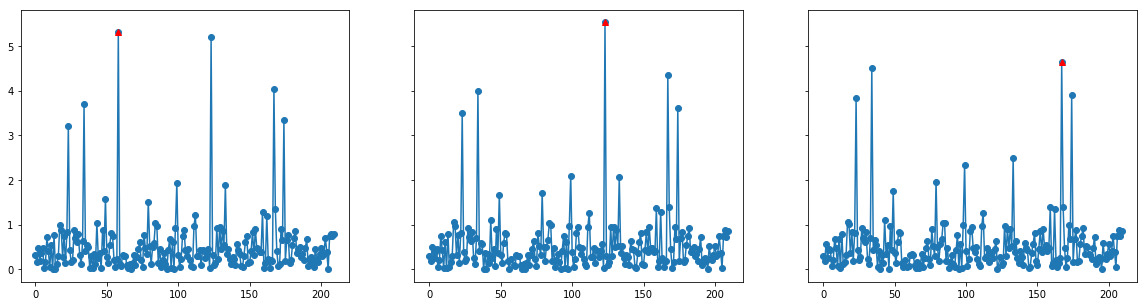

In [24]:
"""
1- Les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables
(en abscisse : l’index des variables, en ordonné : la valeur des stats)"""

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
ax[0].plot(result_SF_critere[4][0],result_SF_critere[3][0],'-o')
ax[0].plot(res_select_forward_crit['Vecteurs'][0],res_select_forward_crit['t-stat'][0],'^', color='r')
ax[1].plot(result_SF_critere[4][1],result_SF_critere[3][1],'-o')
ax[1].plot(res_select_forward_crit['Vecteurs'][1],res_select_forward_crit['t-stat'][1],'^', color='r')
ax[2].plot(result_SF_critere[4][2],result_SF_critere[3][2],'-o')
ax[2].plot(res_select_forward_crit['Vecteurs'][2],res_select_forward_crit['t-stat'][2],'^', color='r')

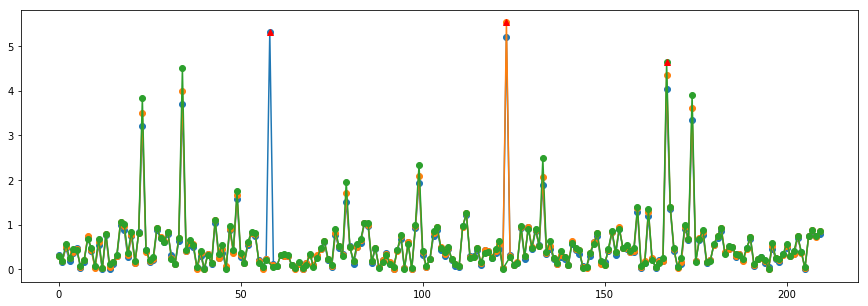

In [25]:
"""Les 3 courbes superposées où l'on peut observer que les t-stats diminuent après chaque itération"""

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), sharey=False)
plt.plot(result_SF_critere[4][0],result_SF_critere[3][0],'-o')
plt.plot(res_select_forward_crit['Vecteurs'][0],res_select_forward_crit['t-stat'][0],'^', color='r')
plt.plot(result_SF_critere[4][1],result_SF_critere[3][1],'-o')
plt.plot(res_select_forward_crit['Vecteurs'][1],res_select_forward_crit['t-stat'][1],'^', color='r')
plt.plot(result_SF_critere[4][2],result_SF_critere[3][2],'-o')
plt.plot(res_select_forward_crit['Vecteurs'][2],res_select_forward_crit['t-stat'][2],'^', color='r')

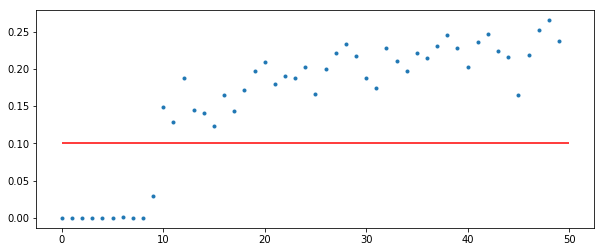

In [26]:
"""
2- Le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). 
Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0:1. """

figure(figsize=(10,4))
plt.plot(res_select_forward['p-val'][:50],'.')
plt.hlines(0.1,0,50, colors='r')


In [27]:
"""
3- Enfin on donnera la liste des variables sélectionnées."""

liste_variables_select = res_select_forward_crit['Vecteurs'][0:]
print ("liste des variables sélectionnées : \n" + liste_variables_select.to_string())

liste des variables sélectionnées : 
0      58
1     123
2     167
3      34
4     174
5      23
6     133
7      79
8      99
9      49
10    168


***
## Q-10
**Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.**

In [28]:
# Selection des variables sur le train :
X_train_SF = X_train[liste_variables_select]

# Régression avec Select Forward
reg_SF = lr(fit_intercept= True).fit(X_train_SF,Y_train)


In [29]:
# Selection des même variables sur le test : 
X_test_SF = X_test[liste_variables_select]

# Prédiction sur l'échantillon test à partir du modèle entrainé : 
Y_pred_SF = reg_SF.predict(X_test_SF)

In [30]:
# coef de détermination R²:
cd_ols = reg.score(X_test,Y_test)
cd_pca = reg_pca.score(X_test_pca,Y_test)
cd_sf = reg_SF.score(X_test_SF,Y_test)

# Risque de prédiction : Méthode de calcul avec Sklearn MSE
mse_ols = mean_squared_error(Y_test,Y_pred)
mse_pca = mean_squared_error(Y_test,Y_pred_pca)
mse_sf = mean_squared_error(Y_test,Y_pred_SF)

# Risque de prédiction : Méthode de calcul comme vue en cours
sigma2_PCA = (Y_test-Y_pred_pca).apply(np.square).sum()/(len(Y_test)- np.linalg.matrix_rank(X_test_pca))
sigma2_OLS = (Y_test-Y_pred).apply(np.square).sum()/(len(Y_test)- np.linalg.matrix_rank(X_test))
sigma2_SF = (Y_test-Y_pred_SF).apply(np.square).sum()/(len(Y_test) - np.linalg.matrix_rank(X_test_SF))
r_pred_ols = sigma2_OLS*np.linalg.matrix_rank(X_test)/len(Y_test)
r_pred_pca = sigma2_PCA*np.linalg.matrix_rank(X_test_pca)/len(Y_test)
r_pred_sf = sigma2_SF*np.linalg.matrix_rank(X_test_SF)/len(Y_test)

print ("R_pred OLS sans PCA selon la définition du cours : %0.4f" %r_pred_ols.values[0])
print ("R_pred OLS avec PCA selon la définition du cours : %0.4f" %r_pred_pca.values[0])
print ("R_pred Select_Forward selon la définition du cours : %0.4f" %r_pred_sf.values[0])

print ("\nCoef de détermination OLS sans PCA : %0.4f" %cd_ols)
print ("Coef de détermination OLS avec PCA : %0.4f" %cd_pca)
print ("Coef de détermination Select_Forward : %0.4f" %cd_sf)

print ("\nMSE OLS sans PCA : %0.4f" %mse_ols)
print ("MSE OLS avec PCA : %0.4f" %mse_pca)
print ("MSE Select_Forward : %0.4f" %mse_sf)

R_pred OLS sans PCA selon la définition du cours : 11461.1036
R_pred OLS avec PCA selon la définition du cours : 8032.6459
R_pred Select_Forward selon la définition du cours : 480.4462

Coef de détermination OLS sans PCA : -0.0026
Coef de détermination OLS avec PCA : 0.2973
Coef de détermination Select_Forward : 0.3834

MSE OLS sans PCA : 5539.5334
MSE OLS avec PCA : 3882.4455
MSE Select_Forward : 3406.8006


**On constate que le model select forward à de meilleurs prédicteurs que OLS et OLS avec PCA**

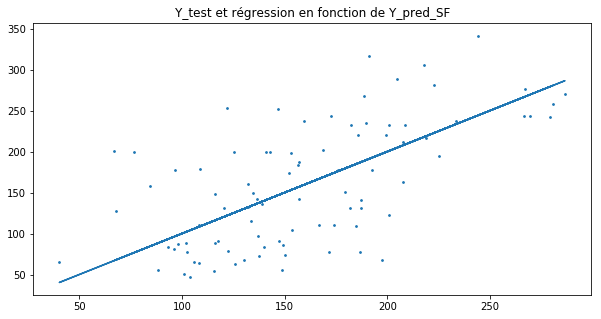

In [31]:
"""Illustation de la prédiction avec le Select Forward"""

figure(figsize=(10,5))
plt.plot(reg_SF.predict(X_test_SF), reg_SF.predict(X_test_SF), '-')
plt.scatter(reg_SF.predict(X_test_SF), Y_test, s=3)
plt.title("Y_test et régression en fonction de Y_pred_SF")
plt.show()

***
## Q-11
**Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.**

In [32]:
from sklearn.model_selection import KFold

# Split Train : X_cv /  Test : X_test
# X_cv, X_test, Y_cv, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# On reset l'index
X_cv = X_train
Y_cv = Y_train
X_cv.reset_index(drop=True, inplace=True)
Y_cv.reset_index(drop=True, inplace=True)

# k folds -> Split en Train : X_train_cv / Validation :  X_val
n_splits=4
kf = KFold(n_splits, shuffle=True, random_state=2)

X_train_cv, X_val_cv = [], [] 
Y_train_cv, Y_val_cv = [], [] 

i=0
for train, val in kf.split(X_cv):
    i+=1
    print(str("_")*80)
    print(f'\nFold {i}\nTrain -> len : {len(train)}\n{train} \n\nValidation -> len : {len(val)}\n{val}')
#     print(f'Folds\nTrain -> len : {len(train)}\n{train} \nValidation -> len : {len(val)}\n{val}\n\n')
    X_train_cv.append(X_cv.loc[train,:])
    X_val_cv.append(X_cv.loc[val,:])
    Y_train_cv.append(Y_cv.loc[train])
    Y_val_cv.append(Y_cv.loc[val])

________________________________________________________________________________

Fold 1
Train -> len : 264
[  0   1   2   4   5   6   8   9  11  14  15  16  18  19  21  22  23  26
  27  28  31  32  33  34  36  37  38  39  40  42  43  44  45  46  47  48
  49  50  51  52  53  54  56  57  58  59  61  62  63  64  71  72  73  74
  75  76  78  79  80  81  82  83  85  86  87  88  90  91  92  93  95  96
  97 101 102 103 104 105 106 107 108 109 110 111 113 115 116 117 118 119
 120 121 122 123 124 125 127 129 130 132 133 134 135 136 137 138 139 140
 141 143 144 145 148 149 154 155 158 159 162 164 165 166 167 168 170 171
 173 175 176 177 178 179 181 182 183 184 185 186 187 190 191 193 194 195
 196 197 198 200 201 202 203 204 205 207 208 209 211 212 213 214 218 219
 220 221 222 224 226 228 229 231 233 235 237 238 239 242 243 245 246 247
 248 249 250 252 253 254 255 256 258 259 260 261 263 265 266 267 270 271
 272 273 274 275 277 278 279 280 281 282 283 284 286 287 288 289 290 292
 293 294 295 296

***
## Q-12
**Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune
des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour
estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du
risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir
l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur
du risque sur le test.**

In [33]:
from sklearn.linear_model import Ridge

# Hyperparamètre à tester 
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

# Dataframe des résultats
res_cv = np.zeros((len(X_train_cv), len(alphas)))
res_cv[0,:] = alphas 

rang = np.linalg.matrix_rank(X_cv)

for k, alpha in enumerate(alphas) :
    for fold in range(len(X_train_cv)) :    
        # Entrainement du modèle 
        lr_ridge = Ridge(alpha, normalize=True)
        model_ridge = lr_ridge.fit(X_train_cv[fold], Y_train_cv[fold])
        Y_pred = lr_ridge.predict(X_val_cv[fold])
        res_cv[fold,k] = model_ridge.score(X_val_cv[fold],Y_val_cv[fold])

res_cv_df = pd.DataFrame(res_cv, columns=[f'{alpha:.7f}' for alpha in alphas])

In [34]:
best_alpha_ridge = res_cv_df.mean().idxmax()
best_R_pred_ridge = res_cv_df.mean().max()

print(f'Le plus grand coef. de détermination (R²) {best_R_pred_ridge:.4f} est obtenu pour alpha = {float(best_alpha_ridge):.4f}.')

# Affichage du min/max/moyenne par alpha
res_cv_df.describe()

Le plus grand coef. de détermination (R²) 0.3964 est obtenu pour alpha = 0.2097.


,0.0000100,0.0000112,0.0000126,0.0000141,0.0000159,0.0000178,0.0000200,0.0000225,0.0000252,0.0000283,...,35297.0730273,39626.8863870,44487.8283113,49945.0511586,56071.6993821,62949.8899022,70671.8127393,79340.9666580,89073.5463861,100000.0000000
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.378594,0.378596,0.378599,0.378601,0.378604,0.378608,0.378612,0.378616,0.378621,0.378626,...,-0.024977,-0.024987,-0.024996,-0.025004,-0.025012,-0.025018,-0.025024,-0.025029,-0.025034,-0.025038
std,0.090626,0.090628,0.090630,0.090633,0.090635,0.090638,0.090642,0.090646,0.090650,0.090655,...,0.021362,0.021363,0.021364,0.021364,0.021365,0.021366,0.021366,0.021367,0.021367,0.021368
min,0.280410,0.280410,0.280409,0.280409,0.280409,0.280409,0.280408,0.280408,0.280408,0.280407,...,-0.043898,-0.043907,-0.043915,-0.043922,-0.043929,-0.043934,-0.043939,-0.043944,-0.043948,-0.043951
25%,0.312673,0.312674,0.312676,0.312677,0.312679,0.312681,0.312683,0.312685,0.312688,0.312691,...,-0.043220,-0.043232,-0.043243,-0.043253,-0.043261,-0.043269,-0.043276,-0.043282,-0.043288,-0.043293
50%,0.384379,0.384381,0.384382,0.384384,0.384386,0.384388,0.384391,0.384393,0.384396,0.384400,...,-0.025466,-0.025478,-0.025488,-0.025497,-0.025506,-0.025513,-0.025519,-0.025525,-0.025530,-0.025535
75%,0.450300,0.450302,0.450305,0.450308,0.450311,0.450315,0.450319,0.450324,0.450329,0.450335,...,-0.007223,-0.007233,-0.007241,-0.007249,-0.007256,-0.007262,-0.007267,-0.007272,-0.007276,-0.007280
max,0.465209,0.465215,0.465221,0.465229,0.465237,0.465247,0.465258,0.465270,0.465283,0.465298,...,-0.005075,-0.005085,-0.005093,-0.005100,-0.005107,-0.005113,-0.005118,-0.005122,-0.005127,-0.005130


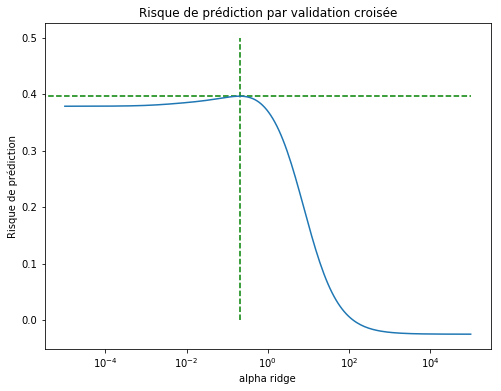

In [35]:
plt.figure(figsize=(8,6))
plt.plot(alphas, res_cv_df.mean(), '-')
plt.title('Risque de prédiction par validation croisée')
plt.xlabel('alpha ridge')
plt.ylabel('Risque de prédiction')
plt.vlines(float(best_alpha_ridge),0,0.5,linestyles='dashed',colors='green')
plt.hlines(best_R_pred_ridge,0,10**5,linestyles='dashed', colors='green')

plt.gca().set_xscale('log')
plt.show()

In [36]:
# fitting sur le Train avec le meilleur alpha et application sur le test:
reg_RidgeCV = Ridge(float(best_alpha_ridge),normalize=True)
reg_RidgeCV.fit(X_cv,Y_cv)
Y_pred_Ridge = pd.DataFrame(reg_RidgeCV.predict(X_test))
cd_ridge = reg_RidgeCV.score(X_test,Y_test)
mse_ridge = mean_squared_error(Y_test,Y_pred_Ridge)
sigma2_Ridge = (Y_test-Y_pred_Ridge.values).apply(np.square).sum()/(len(Y_test) - np.linalg.matrix_rank(X_test))
r_pred_ridge = sigma2_Ridge*np.linalg.matrix_rank(X_test)/len(Y_test)


print(f"Le coef de détermination R² de Ridge = {cd_ridge:.6f}")
print(f"Le MSE de Ridge = {mse_ridge:.3f}")
print(f"R_pred de Ridge = {r_pred_ridge.values[0]:.4f}")

Le coef de détermination R² de Ridge = 0.286034
Le MSE de Ridge = 3944.779
R_pred de Ridge = 8161.6119


***
## Q-13
**A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.**

Computing regularization path using the coordinate descent lasso...


(0, 12000)

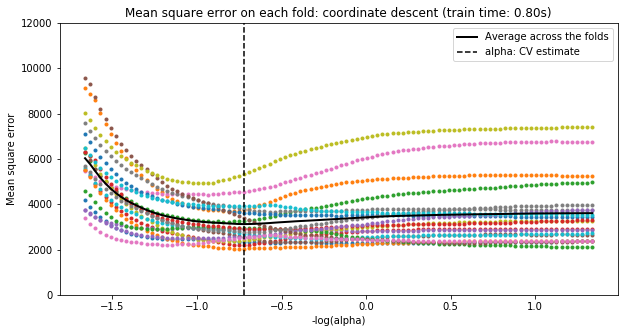

In [37]:
import time
from sklearn.linear_model import LassoCV

# LassoCV: coordinate descent
# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X_train, Y_train)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
ymin, ymax = 0, 12000

figure(figsize=(10,5))
plt.plot(m_log_alphas, model.mse_path_, '.')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ''(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

***
## Q-14
**Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO.**

In [38]:
# variables selectionnées par Lasso : 
Bn_train_lasso = pd.DataFrame(model.coef_)
index_liste = Bn_train_lasso.loc[Bn_train_lasso[0]!=0].index
X_train_lasso = X_train[index_liste]
print ("Il y a %d vecteurs selectionnées par Lasso : \n" %len(list(X_train_lasso.columns.values)) + str(list(X_train_lasso.columns.values))) 

# Méthode Least-square Lasso : 
reg_lasso = lr(fit_intercept=True).fit(X_train_lasso,Y_train)
X_test_lasso = X_test[index_liste]
Y_pred_lasso = reg_lasso.predict(X_test_lasso)
cd_lasso = reg_lasso.score(X_test_lasso, Y_test)
mse_lasso = model.mse_path_.mean()
print("\nLe coef. de prédiction de LS.Lasso est %0.5f" %cd_lasso) 
print("\nLe MSE de LS.Lasso est %0.5f" %mse_lasso)


Il y a 14 vecteurs selectionnées par Lasso : 
[8, 49, 58, 84, 111, 112, 123, 129, 154, 159, 167, 168, 174, 208]

Le coef. de prédiction de LS.Lasso est 0.29015

Le MSE de LS.Lasso est 3578.64725


## Bilan des 4 méthodes utilisées :

In [39]:
Bilan = pd.DataFrame(index=['OLS','PCA','SF','Ridge','Lasso'], columns=['R²','Risque Pred','MSE'])
Bilan.loc['OLS','R²']=cd_ols
Bilan.loc['PCA','R²']=cd_pca
Bilan.loc['Ridge','R²']=cd_ridge
Bilan.loc['SF','R²']=cd_sf
Bilan.loc['Lasso','R²']=cd_lasso

Bilan.loc['OLS','Risque Pred']=r_pred_ols.values[0]
Bilan.loc['PCA','Risque Pred']=r_pred_pca.values[0]
Bilan.loc['Ridge','Risque Pred']=r_pred_ridge.values[0]
Bilan.loc['SF','Risque Pred']=r_pred_sf.values[0]

Bilan.loc['OLS','MSE']=mse_ols
Bilan.loc['PCA','MSE']=mse_pca
Bilan.loc['Ridge','MSE']=mse_ridge
Bilan.loc['SF','MSE']=mse_sf
Bilan.loc['Lasso','MSE']=mse_lasso

print("best_mse = "+str(Bilan['MSE'].sort_values(ascending=True).index[0]))
print("best_r2 = "+str(Bilan['R²'].sort_values(ascending=False).index[0]))
print("best_rpred = "+str(Bilan['Risque Pred'].sort_values(ascending=True).index[0]))


best_mse = SF
best_r2 = SF
best_rpred = SF


In [40]:
liste_variables_select

0      58
1     123
2     167
3      34
4     174
5      23
6     133
7      79
8      99
9      49
10    168
Name: Vecteurs, dtype: int64

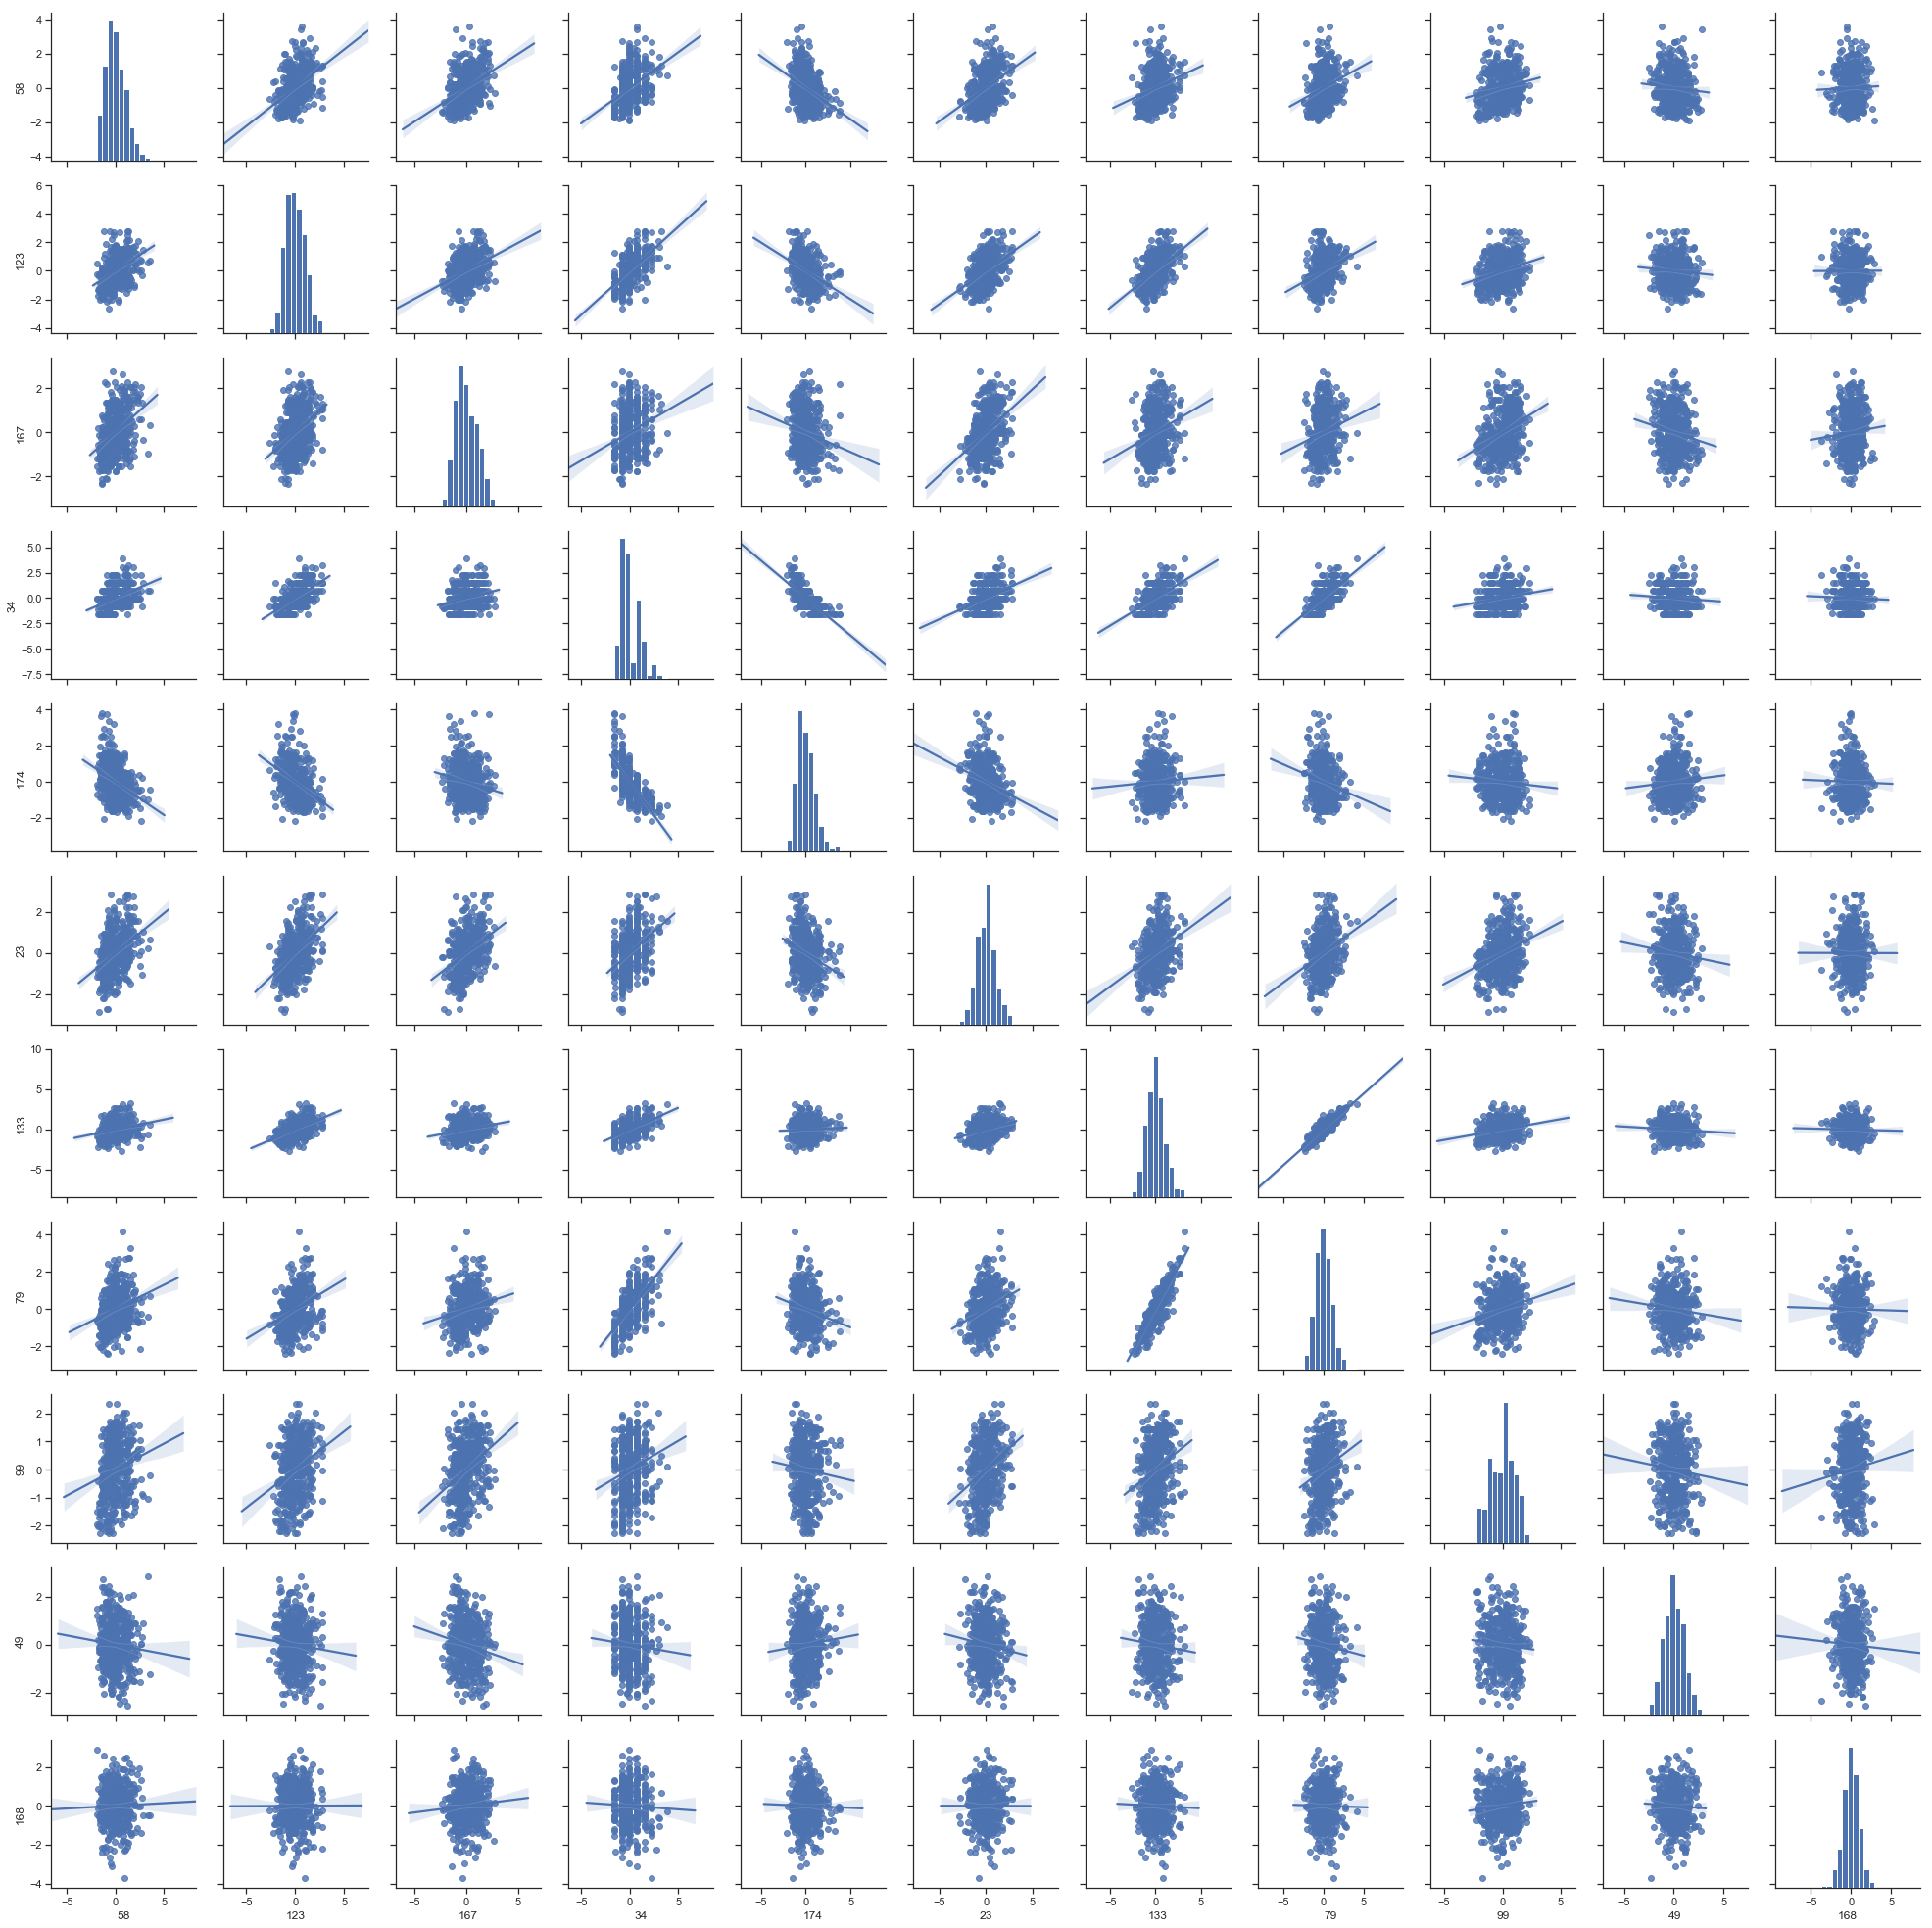

In [41]:
sns.set(style="ticks")
sns.pairplot(X.loc[:,liste_variables_select.values], kind = 'reg')

***
## Q-15
**Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les
variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.**